<a href="https://colab.research.google.com/github/rushikeshnakhate/A2DataTech/blob/master/quandl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# To8FykGVWau5WWQq1Sai
# Quandle API KEY
# pip install Quandl
# pip install jugaad_data
# pip install mpl-finance

In [58]:
import quandl
from google.colab import data_table
from datetime import datetime,timedelta
QUANDLE_API_KEY= "To8FykGVWau5WWQq1Sai"
quandl.api_config.api_key = QUANDLE_API_KEY


In [101]:
from datetime import date
from jugaad_data.nse import stock_df
df = stock_df(symbol="SBIN", from_date=date(2024,1,1),to_date=date(2024,2,15), series="EQ")

**PLOT PRICE AND VOLUME as PER BOOK**

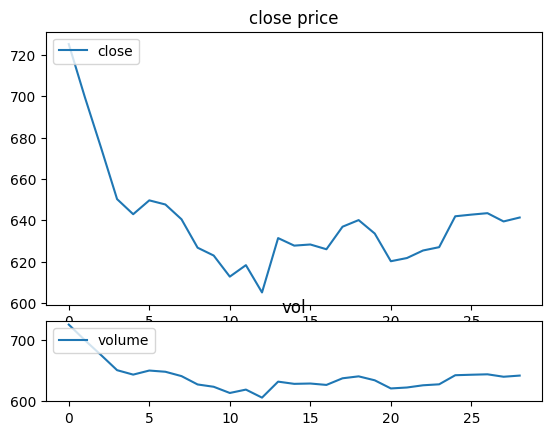

In [72]:
# Ploting price and volume
close =  df['CLOSE']
volumes = df['VOLUME']

top = plt.subplot2grid((4,4),(0,0),rowspan=3 , colspan=4)
top.plot(close.index,close, label='close')
plt.title('close price')
plt.legend(loc=2)


bottom = plt.subplot2grid((4,4),(3,0),rowspan=1 , colspan=4)
bottom.plot(close.index,close, label='volume')
plt.title('vol')
plt.legend(loc=2)

# **PLOT CANDLE PATTERN**

Error: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


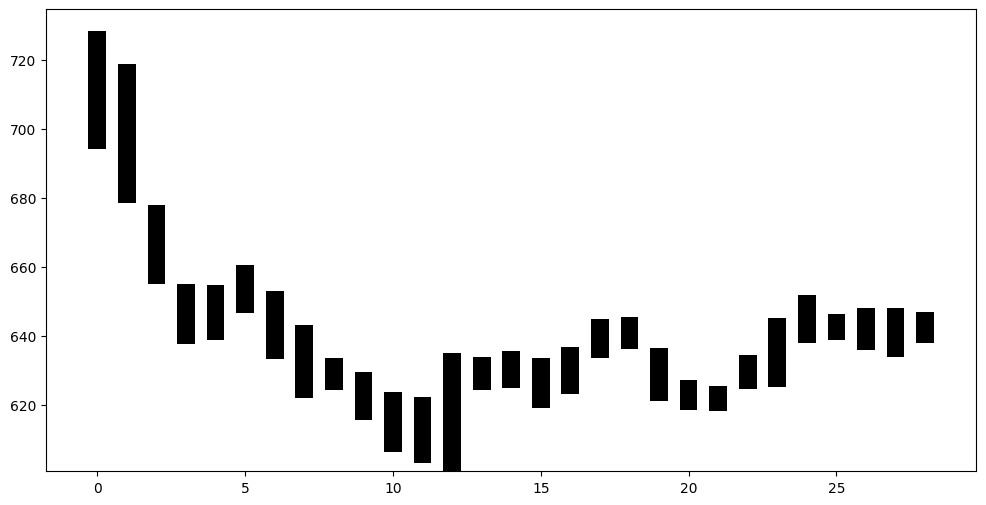

In [106]:
import matplotlib.pyplot as plt
import pandas as pd

# Specify parameters (assuming your stock_df() handles symbol, dates, and series)
symbol = "SBIN"
from_date = pd.to_datetime("2024-01-01")
to_date = pd.to_datetime("2024-02-15")
series = "EQ"
try:
    # df = stock_df(symbol="SBIN", from_date=date(2024,1,1),to_date=date(2024,2,15), series="EQ")
    # Fetch data using your stock_df() function
    df = stock_df(symbol=symbol, from_date=from_date, to_date=to_date, series=series)

    # Validate DataFrame structure (adjust column names as needed)
    if "OPEN" not in df.columns or "HIGH" not in df.columns or "LOW" not in df.columns or "CLOSE" not in df.columns:
        raise ValueError("Data must contain 'OPEN', 'HIGH', 'LOW', and 'CLOSE' columns.")

    # Create the candle chart
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(df.index, df["HIGH"] - df["LOW"], bottom=df["LOW"], color="black", width=0.6)
    ax.bar(df.index, df["CLOSE"] - df["OPEN"], bottom=df["OPEN"], color="g" if df["CLOSE"] >= df["OPEN"] else "r", width=0.6)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.set_title(f"{symbol} Candle Chart ({from_date} - {to_date})")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

except ValueError as e:
    print("Error:", e)
    # Consider handling API errors, invalid data, etc. gracefully
except Exception as e:
    print("Unexpected error:", e)
    # Include more comprehensive error handling for production code

# PLOT  RETURNS

percenatge change

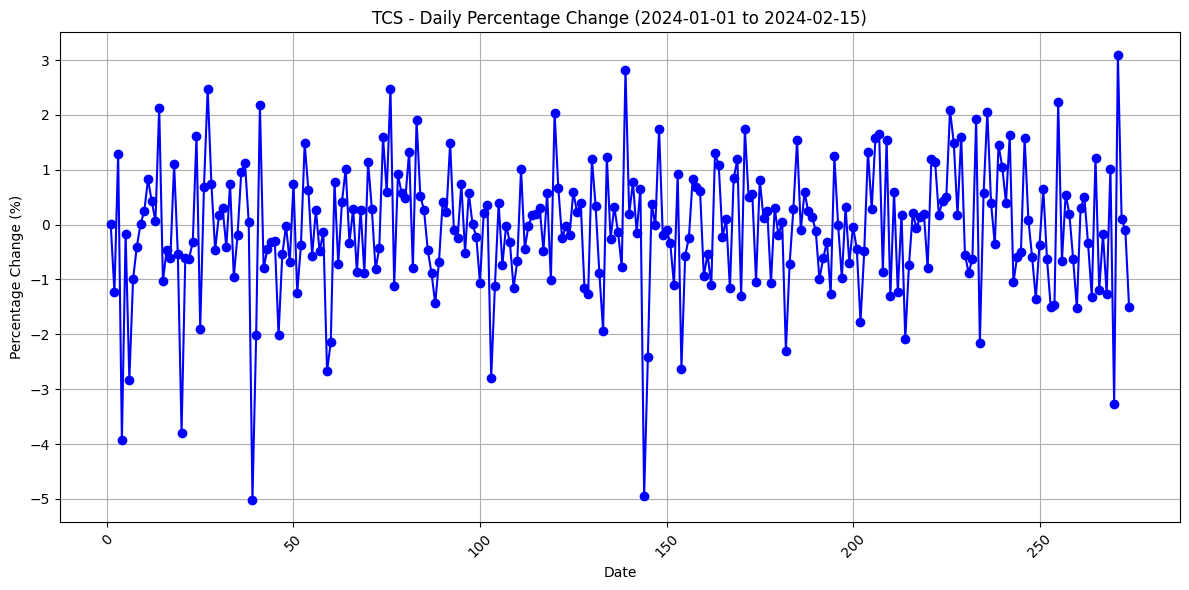

In [114]:
# Specify parameters (assuming your stock_df() handles symbol, dates, and series)
symbol = "TCS"
from_date = pd.to_datetime("2023-01-01")
to_date = pd.to_datetime("2024-02-15")
series = "EQ"
df = stock_df(symbol=symbol, from_date=from_date, to_date=to_date, series=series)


df['Pct_Change'] = df['CLOSE'].pct_change(periods=1) * 100  # Calculate and multiply by 100 to get percentages


import matplotlib.pyplot as plt
# Customize the plot as desired
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(df.index, df['Pct_Change'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.title('TCS - Daily Percentage Change (2024-01-01 to 2024-02-15)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


# **PLOT CUMULATIVE RETURNS**

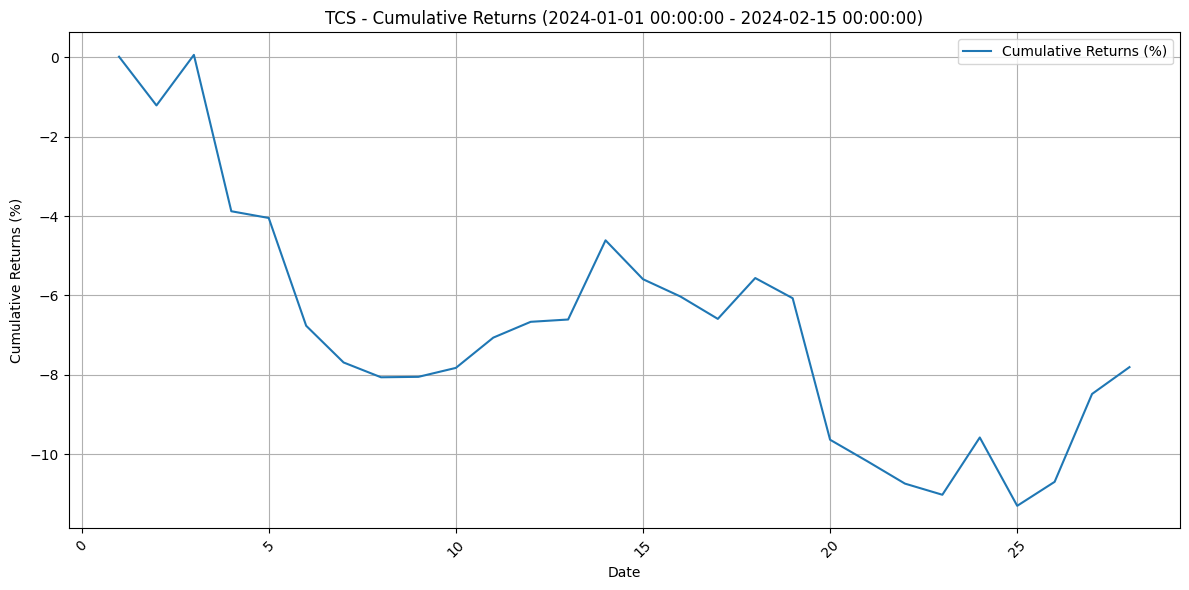

In [117]:
import matplotlib.pyplot as plt
import pandas as pd

# Specify parameters (assuming your stock_df() handles symbol, dates, and series)
symbol = "TCS"
from_date = pd.to_datetime("2024-01-01")
to_date = pd.to_datetime("2024-02-15")
series = "EQ"

try:
    # Fetch data using your stock_df() function
    df = stock_df(symbol=symbol, from_date=from_date, to_date=to_date, series=series)

    # Validate DataFrame structure (adjust column names as needed)
    if "CLOSE" not in df.columns:
        raise ValueError("Data must contain a 'Close' column.")

    # Calculate daily returns
    df["Daily_Returns"] = df["CLOSE"].pct_change()

    # Calculate cumulative returns
    df["Cumulative_Returns"] = (1 + df["Daily_Returns"]).cumprod() - 1

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df["Cumulative_Returns"] * 100, label="Cumulative Returns (%)")
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative Returns (%)")
    ax.set_title(f"TCS - Cumulative Returns ({from_date} - {to_date})")
    ax.grid(True)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.legend()
    plt.show()

except ValueError as e:
    print("Error:", e)
    # Consider handling API errors, invalid data, etc. gracefully
except Exception as e:
    print("Unexpected error:", e)
    # Include more comprehensive error handling for production code


PLOT VOLATILITY - Stand Deviation
